<a href="https://colab.research.google.com/github/Suswarah-Chittoory/Employment-Outcome-Analysis/blob/main/AMCAT_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Loading

In [2]:
df = pd.read_csv(r"/content/drive/MyDrive/Datasets/AMCAT EDA.csv")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
df.shape

(3998, 39)

#Data Cleaning

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Experience', 'Age',
       'Seniority', 'Region'],
      dtype='object')

In [ ]:
df.replace("", pd.NA, inplace = True)
df.replace(" ", pd.NA, inplace = True)
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

Unnamed: 0                object
ID                         int64
Salary                   float64
DOJ                       object
DOL                       object
Designation               object
JobCity                   object
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
Mechanical

In [3]:
# Replace -1 with 0 in numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].replace(-1, 0)

# Replace -1 with NA in categorical columns
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].where(df[categorical_columns] != '-1', np.nan)

In [4]:
from datetime import datetime

df['DOL']= df['DOL'].replace('present', datetime.now().replace(hour=0, minute=0))
df['DOL']=pd.to_datetime(df['DOL'])
df['DOJ']=pd.to_datetime(df['DOJ'])
df['DOB']=pd.to_datetime(df['DOB'])


df['Experience']=abs(round(((df['DOL']-df['DOJ']).dt.days)/365,2))
df['Age']=abs(round(((df['DOB']-df['DOJ']).dt.days)/365,2))

df['Experience'].head()

0    11.74
1    10.48
2     9.74
3    12.66
4     1.00
Name: Experience, dtype: float64

In [5]:
# Define the categories based on experience ranges
bins = [-1, 0, 0.5, 2, 5, 10, float('inf')]
#['Fresher', '6 Months Intern', 'Entry Level', 'Mid Sr Level', 'Senior', 'Team Lead']
categories = range(0, 6, 1)

# Create the 'Seniority' column based on the experience ranges
df['Seniority'] = pd.cut(df['Experience'], bins=bins, labels=categories)
df['Seniority'] = pd.to_numeric(df['Seniority'])
df['Seniority'].value_counts()

2    1180
5     980
4     897
1     506
3     420
0      15
Name: Seniority, dtype: int64

In [6]:
def classify_region(state):
    north_states = ['Uttar Pradesh', 'Delhi', 'Uttarakhand', 'Haryana', 'Punjab', 'Rajasthan', 'Madhya Pradesh', 'Himachal Pradesh', 'Jammu and Kashmir']
    south_states = ['Karnataka', 'Tamil Nadu', 'Telangana', 'Andhra Pradesh', 'Kerala']
    east_states = ['West Bengal', 'Orissa', 'Jharkhand', 'Bihar', 'Assam']
    west_states = ['Maharashtra', 'Gujarat', 'Goa', 'Chhattisgarh']

    state = state.lower()

    if state in [s.lower() for s in north_states]:
        return 1
    elif state in [s.lower() for s in south_states]:
        return 4
    elif state in [s.lower() for s in east_states]:
        return 2
    elif state in [s.lower() for s in west_states]:
        return 3
    else:
        return 0

# Assuming NEWS as the order
df['Region'] = df['CollegeState'].apply(classify_region)
df['Region'].value_counts()

1    1949
4    1314
2     411
3     314
0      10
Name: Region, dtype: int64

In [ ]:
round(df.describe(include = 'all'),3)

<ipython-input-119-fc77af8623df>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  round(df.describe(include = 'all'),3)
<ipython-input-119-fc77af8623df>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  round(df.describe(include = 'all'),3)
<ipython-input-119-fc77af8623df>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  round(df.describe(include = 'all'),3)


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Age,Seniority,Region
count,3998,3998.000,3998.00,3998,3998,3998,3537,3998,3998,3998.000,...,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000
unique,1,NaN,NaN,81,67,419,338,2,1872,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train,NaN,NaN,2014-07-01 00:00:00,2024-02-22 00:00:02.163707,software engineer,Bangalore,m,1991-01-01 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3998,NaN,NaN,199,1875,539,627,3041,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1991-06-01 00:00:00,2005-03-01 00:00:00,NaN,NaN,NaN,1977-10-30 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2015-12-01 00:00:00,2024-02-22 00:00:02.163707,NaN,NaN,NaN,1997-05-27 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,663794.541,307699.85,NaN,NaN,NaN,NaN,NaN,NaN,77.925,...,3.673,-0.038,0.146,0.003,-0.169,-0.138,5.557,22.587,3.155,2.243
std,NaN,363218.246,212737.50,NaN,NaN,NaN,NaN,NaN,NaN,9.850,...,36.559,1.029,0.942,0.951,1.008,1.008,4.687,1.304,1.420,1.353
min,NaN,11244.000,35000.00,NaN,NaN,NaN,NaN,NaN,NaN,43.000,...,0.000,-4.127,-5.782,-4.601,-2.643,-7.376,0.000,0.050,0.000,0.000
25%,NaN,334284.250,180000.00,NaN,NaN,NaN,NaN,NaN,NaN,71.680,...,0.000,-0.714,-0.287,-0.605,-0.868,-0.669,1.000,21.770,2.000,1.000


#EDA with Data Manipulation

## Data Manipulation

<ipython-input-120-637543ab0cfa>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

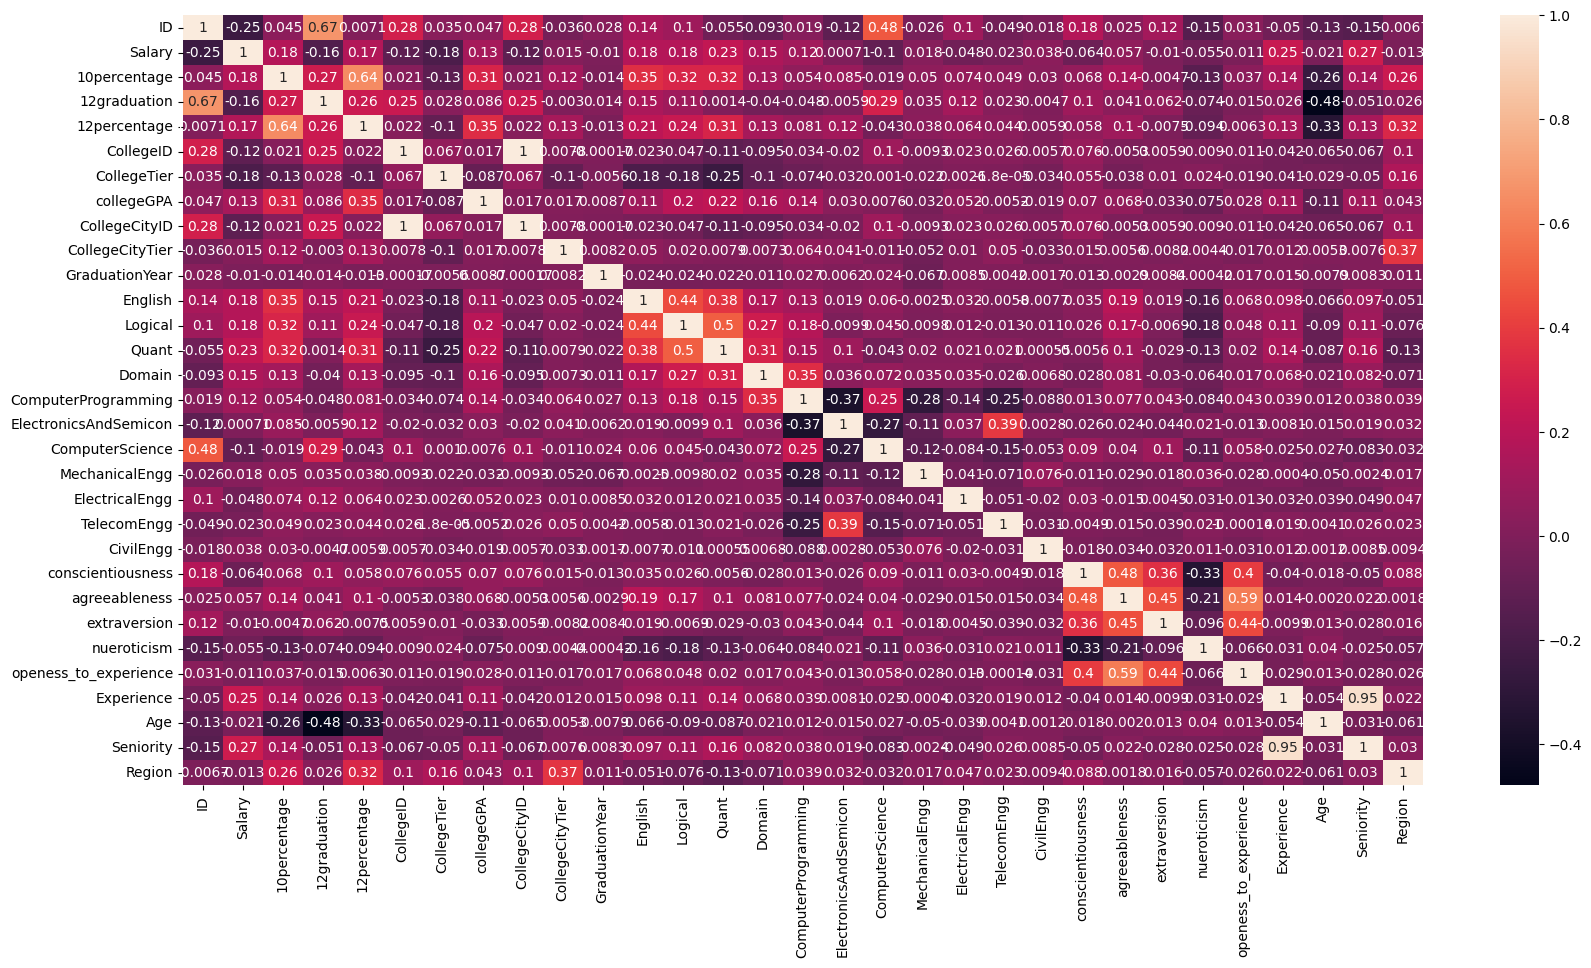

In [ ]:
# To drop irrelavant features

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)

In [7]:
AMCAT = df.drop(['Unnamed: 0','ID','DOL','DOJ', 'DOB','ComputerProgramming','ElectronicsAndSemicon',
         'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness',
         'extraversion', 'nueroticism', 'openess_to_experience', 'CollegeCityID', 'CollegeID'], axis = 1)
AMCAT.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', '10percentage', '10board',
       '12graduation', '12percentage', '12board', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityTier', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'Experience',
       'Age', 'Seniority', 'Region'],
      dtype='object')

In [8]:
AMCAT['Gender'] = np.where(AMCAT['Gender'] == 'm', 1, 0)

## Univariate Analysis

<Axes: xlabel='Experience', ylabel='Count'>

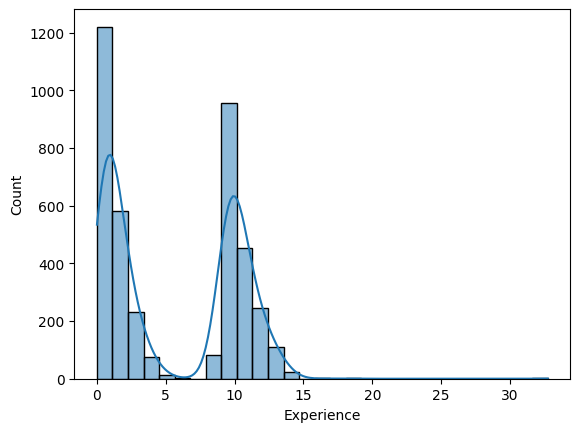

In [ ]:
sns.histplot(AMCAT['Experience'], kde = True)


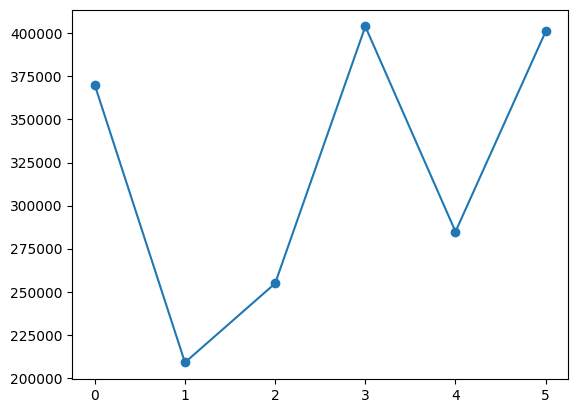

In [ ]:
df_seniority = df.groupby('Seniority').agg(Sal_Med = ('Salary', np.mean)).reset_index()
plt.plot(df_seniority['Seniority'], df_seniority['Sal_Med'], linestyle = '-', marker = 'o')


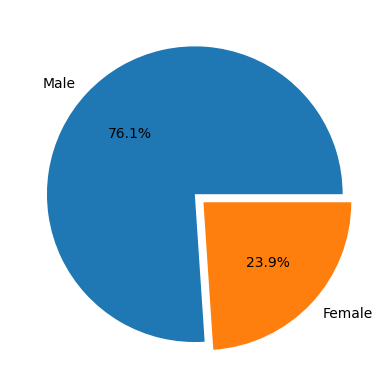

In [ ]:
AMCAT['Gender'].value_counts().plot.pie(explode=[0,0.08], autopct='%1.1f%%', labels=['Male', 'Female'], ylabel="")
plt.show()

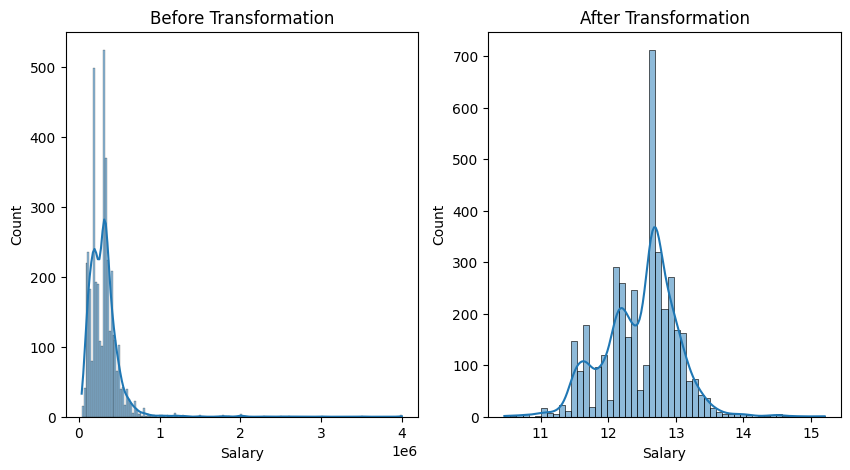

In [ ]:
#Visualization on Salary

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


sns.histplot(df['Salary'],kde = True, ax = axes[0])
axes[0].set_title('Before Transformation')

sns.histplot(np.log(AMCAT['Salary']),kde = True,  ax = axes[1])
axes[1].set_title('After Transformation')

plt.show()


## Bi-Variate Analysis

<ipython-input-126-06cabe2822ed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(AMCAT.corr())


<Axes: >

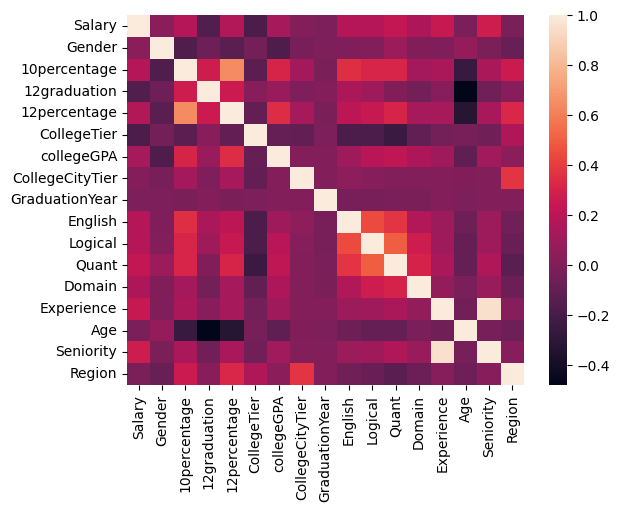

In [ ]:
sns.heatmap(AMCAT.corr())

### Region Analysis

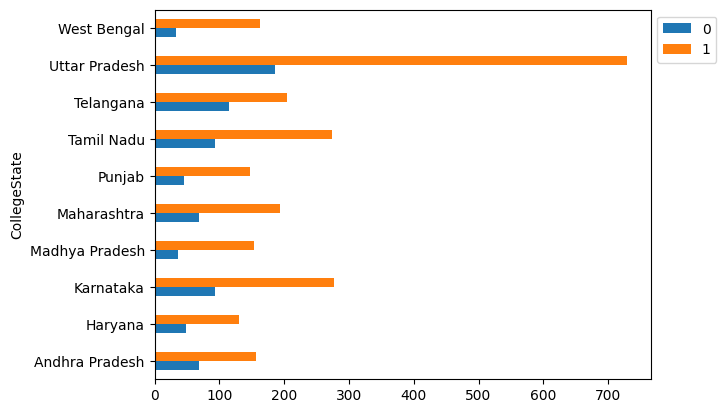

In [ ]:
top_10_states = AMCAT['CollegeState'].value_counts().head(10).index
filtered_data = AMCAT[AMCAT['CollegeState'].isin(top_10_states)]

tab = pd.crosstab(filtered_data['CollegeState'], filtered_data['Gender'])
tab.plot(kind='barh')

plt.legend(bbox_to_anchor=(1, 1))


Uttar Pradesh is the state in high frequency of both Genders and Induvidual genders alone too...

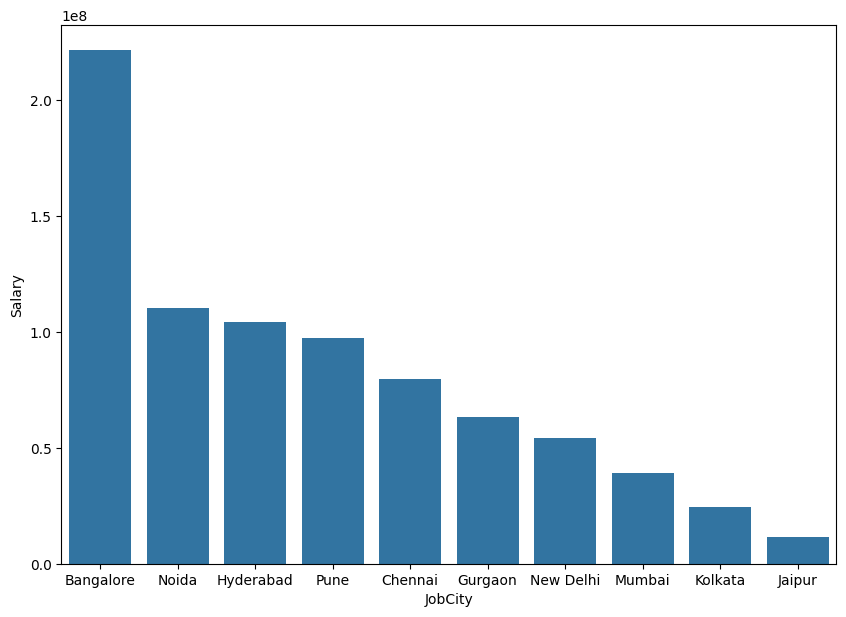

In [ ]:
city_mean_salary = df.groupby('JobCity')['Salary'].sum().reset_index()

# Sort the cities based on mean salary
top_10_cities = city_mean_salary.sort_values(by='Salary', ascending=False).head(10)

# Plot the barplot for the top 10 cities
plt.figure(figsize=(10, 7))
sns.barplot(data=top_10_cities, x='JobCity', y='Salary')
#plt.xticks(rotation=45, ha='right')
plt.show()

## Multi-variate Analysis

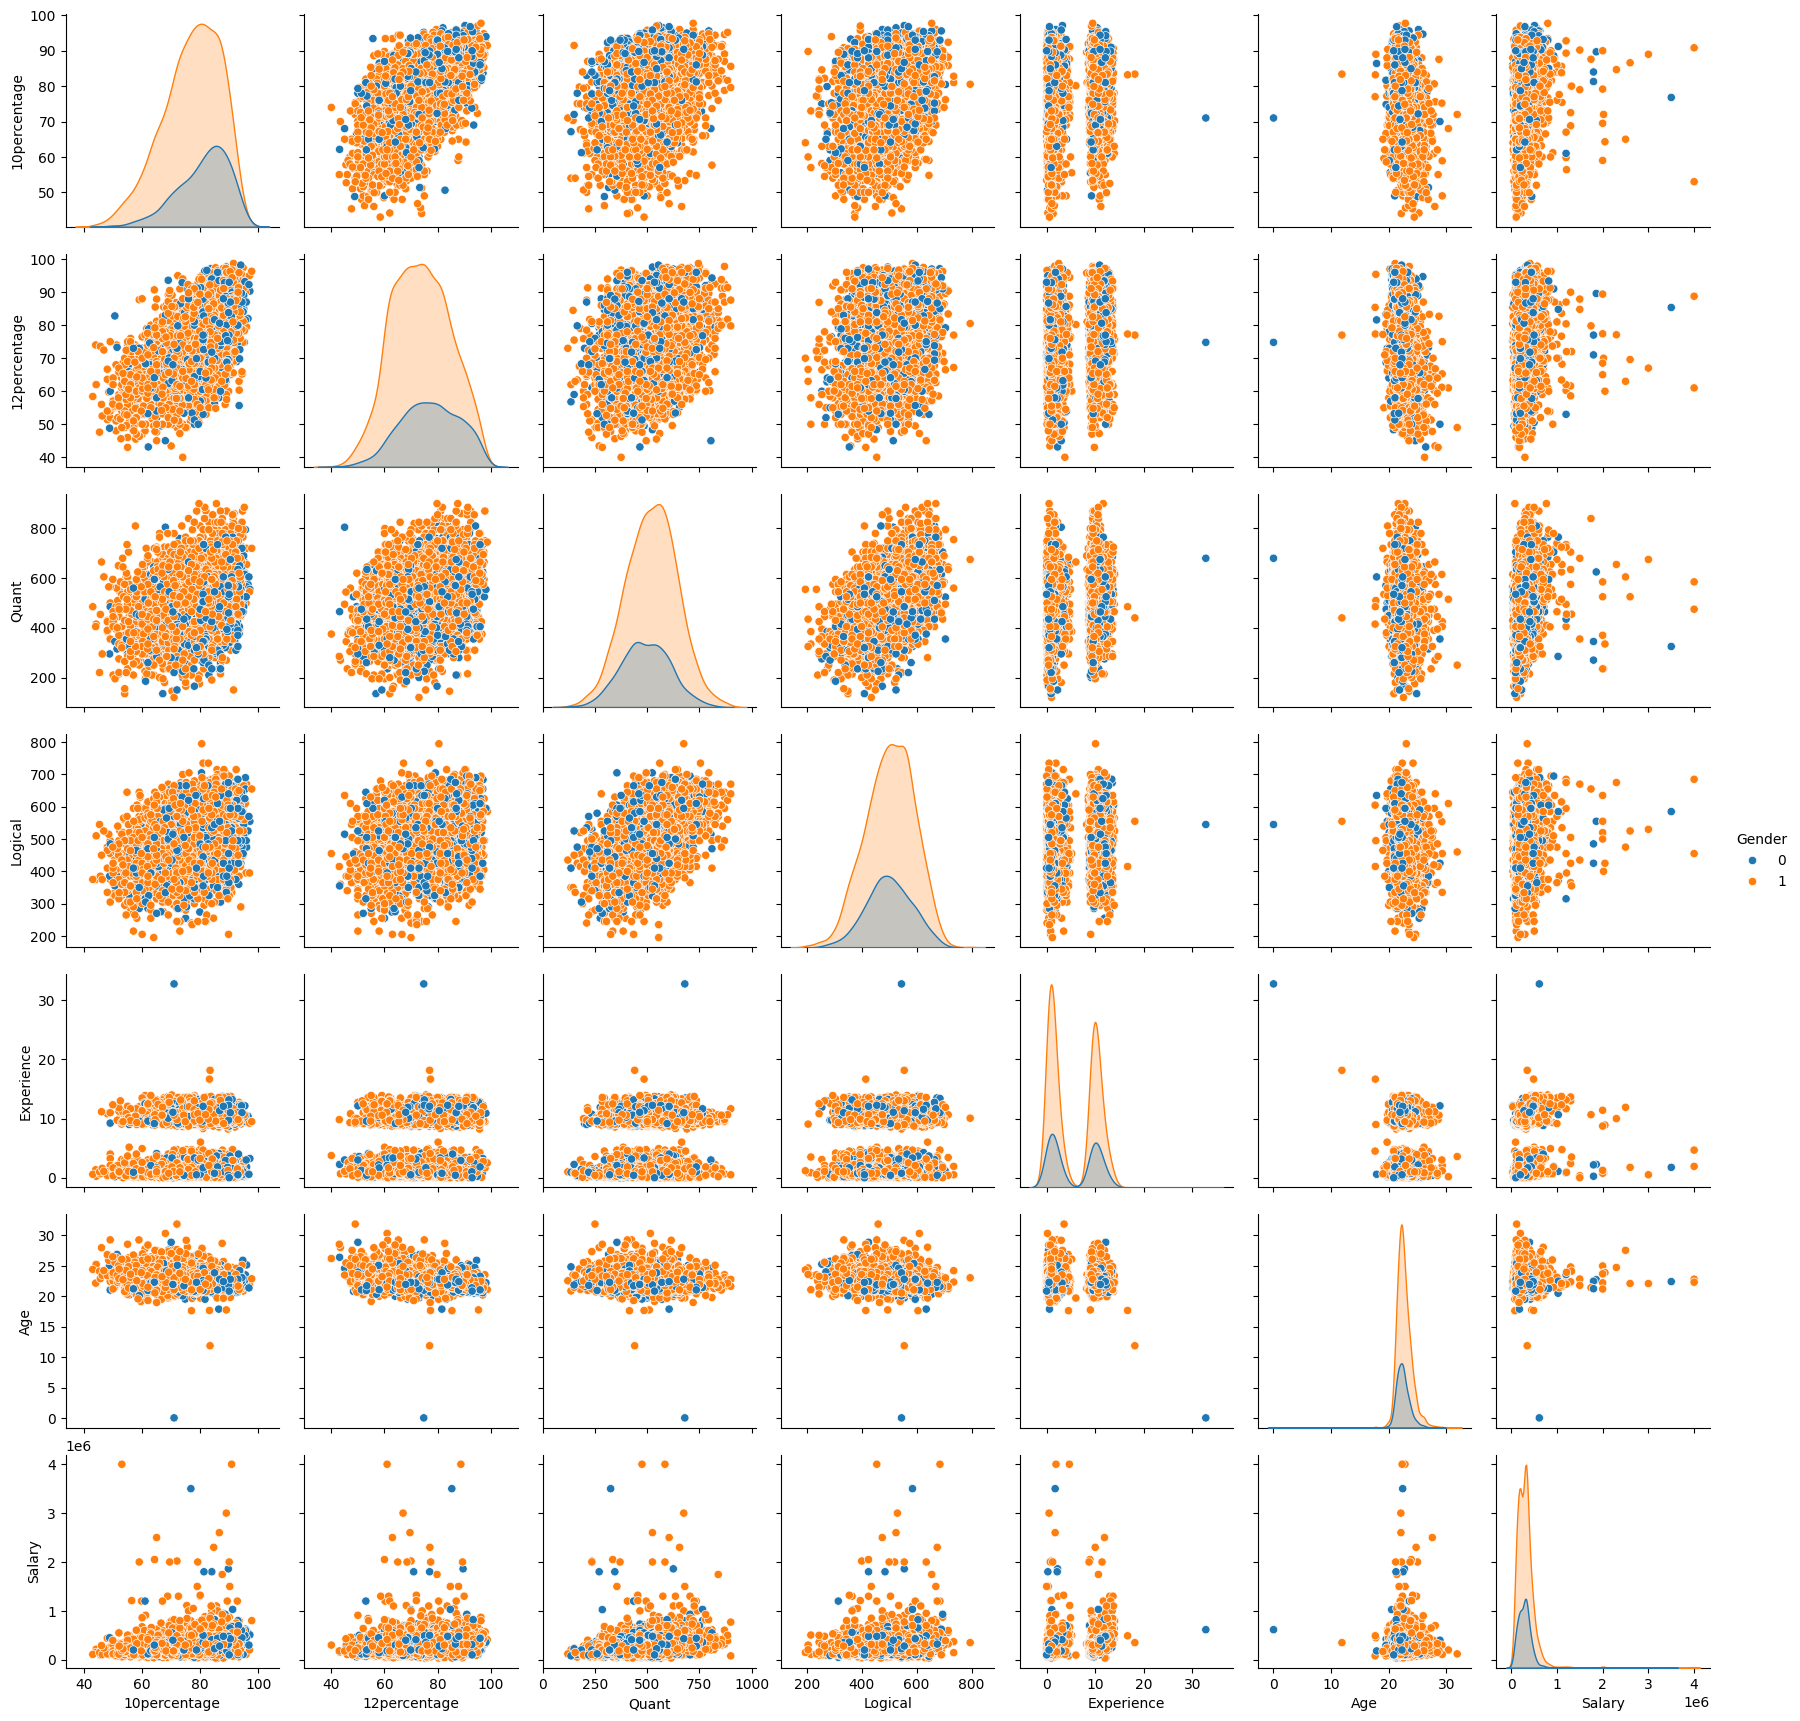

In [ ]:
cols = ['Gender', '10percentage', '12percentage', 'Quant', 'Logical', 'Experience', 'Age', 'Salary']

sns.pairplot(AMCAT[cols], hue = 'Gender' )

plt.show()


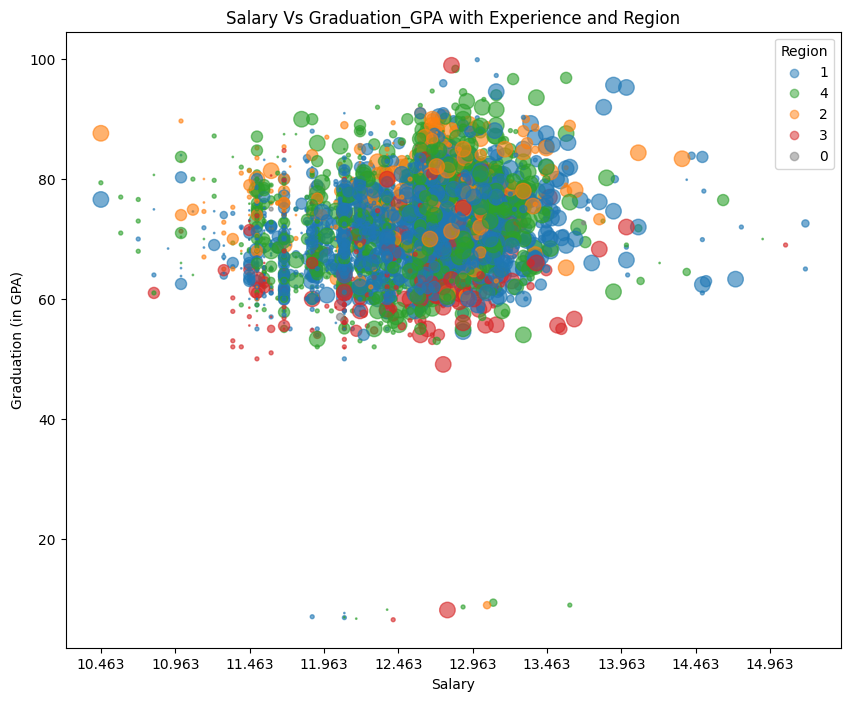

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 8))

# Define colors for each region using a colormap
region_colors = {
    1: 'tab:blue',
    4: 'tab:green',
    2: 'tab:orange',
    3: 'tab:red',
    0: 'tab:gray'  # Handle the case where region is unknown
}

# Scatterplot with improved colors and transparency
scatter = plt.scatter(
    x=np.log(df['Salary']),
    y=df['collegeGPA'],
    c=df['Region'].map(region_colors),  # Use 'Region' column to map colors
    s=(df['Seniority'])**3,
    alpha=0.6,  # Adjust transparency for better visibility of overlapped points
    linewidth=1
)

# Add legend for regions
for region, color in region_colors.items():
    plt.scatter([], [], c=color, label=str(region), alpha=0.5)
plt.legend(title='Region')
plt.xticks(np.arange(np.log(df['Salary']).min(), np.log(df['Salary']).max(), 0.5))

plt.title("Salary Vs Graduation_GPA with Experience and Region")
plt.xlabel("Salary")
plt.ylabel('Graduation (in GPA)')


plt.show()


# Research Hypothesis

###After doing your UG if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.

In [ ]:
cols = ['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer']

df_fresher = AMCAT[(AMCAT['Designation'].str.lower().isin(cols)) & (AMCAT['Experience'] <= 1)]
df_fresher1 = df_fresher.groupby('Designation').agg(Sal_Med = ('Salary', np.min)).reset_index()
df_fresher1


,Designation,Sal_Med
0,associate engineer,300000.0
1,hardware engineer,400000.0
2,programmer analyst,200000.0
3,software engineer,60000.0


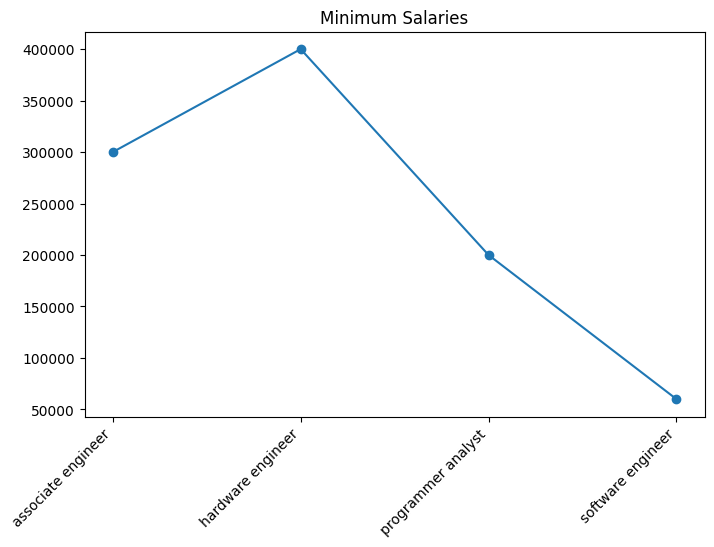

In [ ]:
# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(df_fresher1['Designation'], df_fresher1['Sal_Med'], linestyle='-', marker='o')
plt.xticks(rotation=45, ha='right')
plt.title("Minimum Salaries")
plt.show()

Testing Hypothesis to check whether the statement applies for this data or not...

H_0: m< 250000
H_1: m>=250000

t= (x_bar-m)/sigma/sqrt(n)


In [ ]:
df_fresher['Designation'].value_counts()

software engineer     99
programmer analyst    24
associate engineer     1
hardware engineer      1
Name: Designation, dtype: int64

In [ ]:
from logging import critical
# Import Library
from scipy.stats import t

mu_0 = 250000
t_data1 = []

for i in cols:
  sample_mean = df_fresher[df_fresher['Designation'] == i]['Salary'].mean()
  sample_std = df_fresher[df_fresher['Designation'] == i]['Salary'].std()

  # Calculate the sample size
  degrees_of_freedom = len(df_fresher[df_fresher['Designation'] == i]) - 1

  # Calculate the t-score
  t_score = round((sample_mean - mu_0) / (sample_std / np.sqrt(len(df_fresher[df_fresher['Designation'] == i]))),3)


  # Calculate the p-value associated with the t-score
  p_value = round(1 - t.cdf(t_score, degrees_of_freedom),3)

  critical_value = round(abs(t.ppf(1 - 0.99, degrees_of_freedom)),3)

  if t_score > critical_value:
        test_result = "Reject Null Hypothesis (H0)"
  else:
        test_result = "Fail to Reject Null Hypothesis (H0)"

  t_data1.append({'Designation': i,
                  't_score': t_score,
                    'p_value': p_value,
                    'critical_value': critical_value,
                    'test_result': test_result})

t_df1 = pd.DataFrame(t_data1)
t_df1


,Designation,t_score,p_value,critical_value,test_result
0,programmer analyst,5.696,0.00,2.500,Reject Null Hypothesis (H0)
1,software engineer,1.657,0.05,2.365,Fail to Reject Null Hypothesis (H0)
2,hardware engineer,NaN,NaN,NaN,Fail to Reject Null Hypothesis (H0)
3,associate engineer,NaN,NaN,NaN,Fail to Reject Null Hypothesis (H0)


### Is there a relationship between gender and specialization?

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

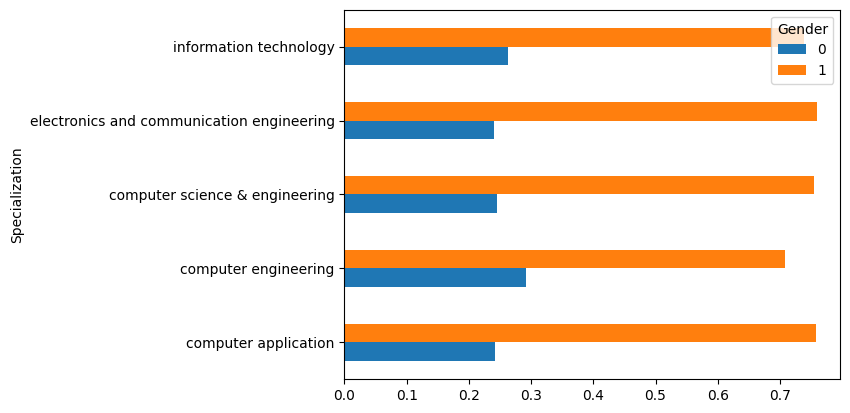

In [ ]:
top_10_specializations = AMCAT['Specialization'].value_counts().head(5).index
filtered_data = AMCAT[AMCAT['Specialization'].isin(top_10_specializations)]

tab = pd.crosstab(filtered_data['Specialization'], filtered_data['Gender'], normalize='index')
tab.plot(kind='barh')

plt


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
if(p_value > 0.05):
  print("Gender and Specialization are independent")
else:
  print("Gender and Specialization are dependent")


Chi-square statistic: 104.46891913608455
P-value: 1.2453868176976918e-06
Degrees of freedom: 45
Expected frequencies table:
Gender and Specialization are dependent


In [ ]:
df3 = AMCAT['Specialization'].value_counts()

mask = df3 < 5
df3 = df3[~mask]

df3.shape

(24,)

In [ ]:
df2 = AMCAT.groupby('Specialization').agg(Sal_Med=('Salary', np.median))
df2.reset_index(inplace=True)
df2_filtered = df2[df2['Specialization'].isin(df3.index)]
df2_filtered.shape

(24, 2)

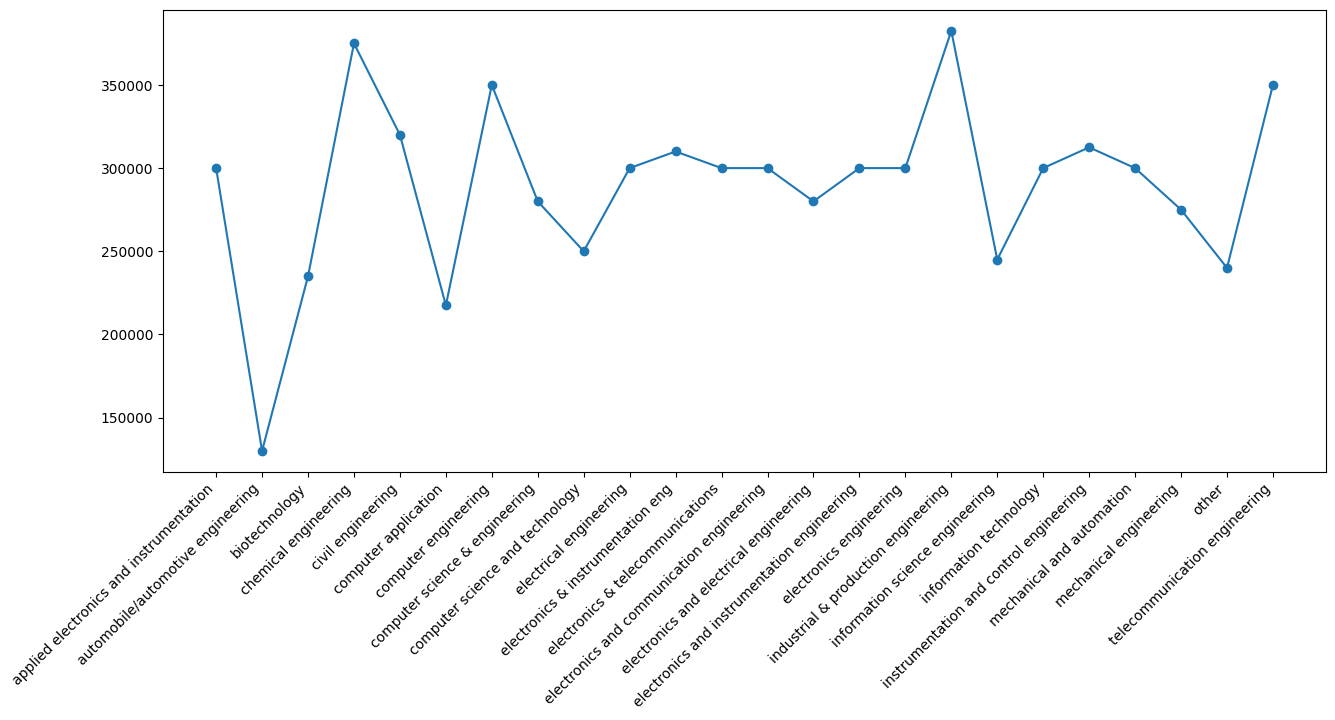

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(df2_filtered['Specialization'], df2_filtered['Sal_Med'], linestyle = '-', marker = 'o')
plt.xticks(rotation=45, ha='right')
plt.show()

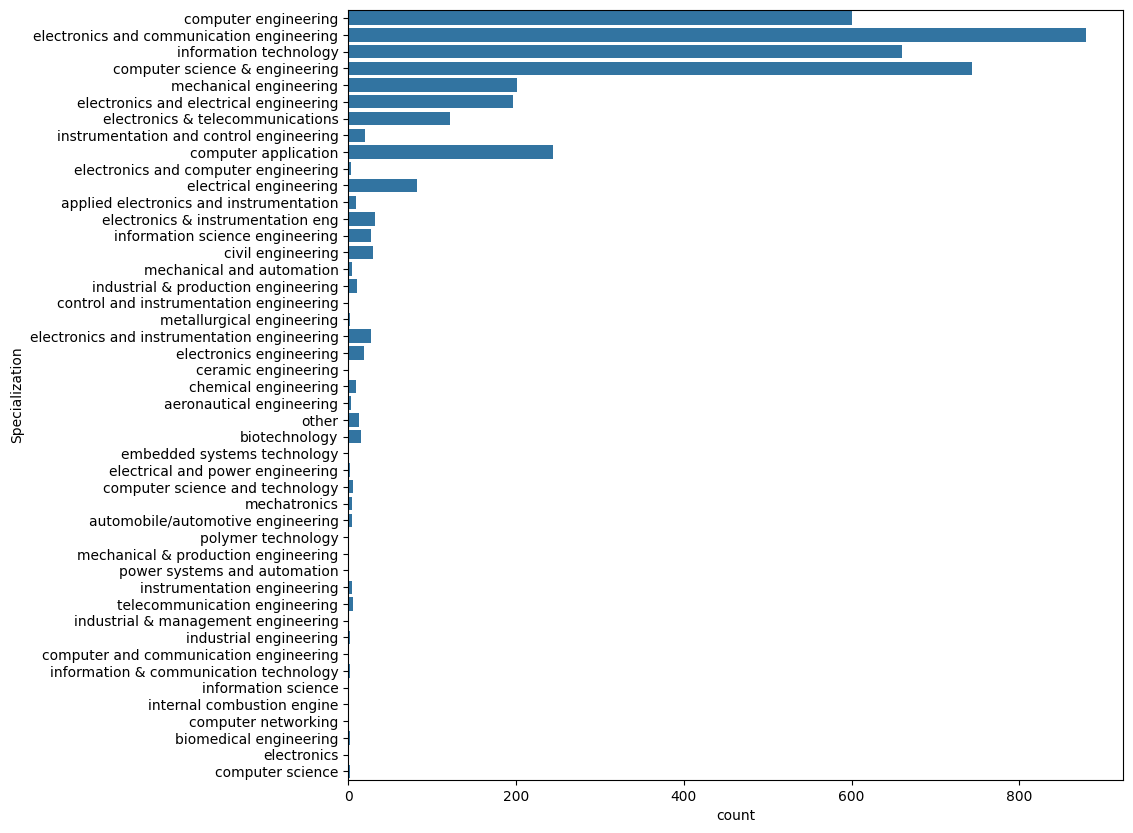

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(df['Specialization'])
plt.show()

### Comparision of CSE and ECE student salaries
mu1 = Mean Sal of computer science & engineering student
mu2 = Mean Sal of electronics and communication engineering

H_0: mu1 = mu2

H_1: mu1 > mu2 or mu1 - mu2 > 0

test stat: t - test for 2 means since mean and var is unknown

t = (x1_bar - x2_bar)/sqrt(s1^2/n1 + s2^2/n2)

In [12]:
from scipy.stats import ttest_ind

Specializations = ['computer science & engineering', 'electronics and communication engineering']

salaries = [df[df['Specialization'] == spec]['Salary'] for spec in Specializations]

# Perform t-test for unknown and unequal standard deviation
t_statistic, p_value = ttest_ind(salaries[0], salaries[1], alternative='greater', equal_var=False)

print(f"T-statistic for {Specializations[0]} vs {Specializations[1]} : {t_statistic}")
print(f"P-value: {p_value}")

# Compare the p-value to the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject Null Hypothesis (H0): CSE graduates earn significantly more than ECE students.")
else:
    print("Fail to Reject Null Hypothesis (H0): There is no significant evidence that CSE graduates earn more than ECE students.")


T-statistic for computer science & engineering vs electronics and communication engineering : -2.2559574453411044
P-value: 0.9878956623990516
Fail to Reject Null Hypothesis (H0): There is no significant evidence that CSE graduates earn more than ECE students.


Therefore, there is no sufficient evidence at 0.05 level of confidence that mean salary of a computer science & engineering student is not more than mean salary of a electronics and communication engineering.